In [19]:
# 📦 Imports - Just NumPy and Matplotlib!
import numpy as np
import matplotlib.pyplot as plt

# For nice inline plots
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Ready to build Linear Regression from scratch!")

✅ Ready to build Linear Regression from scratch!


---
## Step 1: Generate Some Data

Let's create a simple dataset where we **know** the true relationship:

$$y = 2.5x + 3 + \text{noise}$$

Our goal: Can we recover the slope (2.5) and intercept (3) from the noisy data?

In [27]:
# 🎲 Generate synthetic data
np.random.seed(1)  # For reproducibility

# True parameters (what we want to discover)
TRUE_SLOPE = 2.5
TRUE_INTERCEPT = 3.0

# Generate random X values
n_samples = 50
X = np.random.uniform(0, 10, n_samples)

# Generate Y with some noise
noise = np.random.normal(0, 2, n_samples)  # Mean=0, Std=2
y = TRUE_SLOPE * X + TRUE_INTERCEPT + noise

print(f"📊 Generated {n_samples} data points")
print(f"   X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"   y range: [{y.min():.2f}, {y.max():.2f}]")

📊 Generated 50 data points
   X range: [0.00, 9.89]
   y range: [0.57, 28.04]


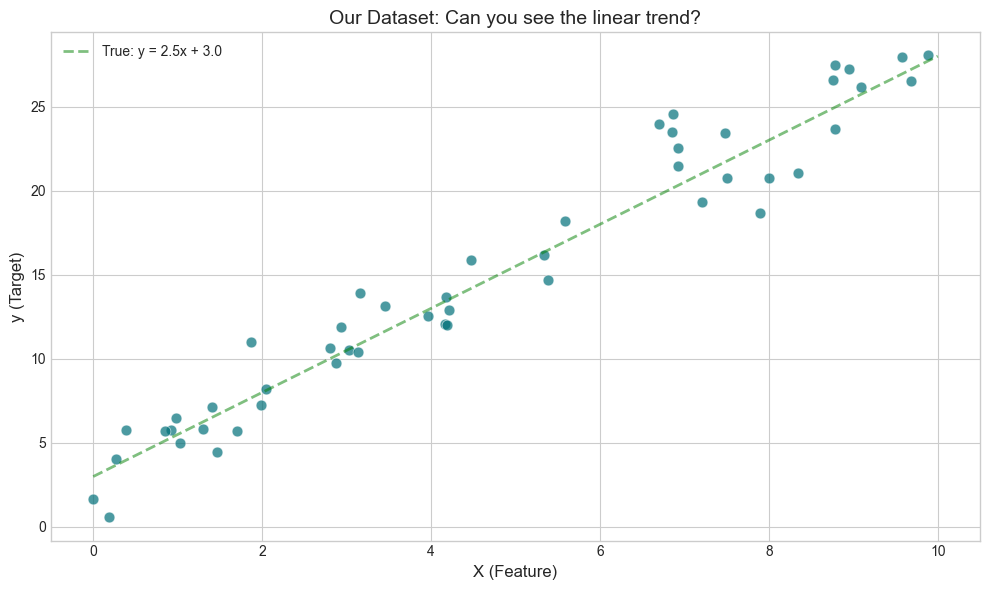

In [37]:
# 📈 Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='#007079', s=60, alpha=0.7, edgecolors='white', linewidth=0.5)
plt.xlabel('X (Feature)', fontsize=12)
plt.ylabel('y (Target)', fontsize=12)
plt.title('Our Dataset: Can you see the linear trend?', fontsize=14)

# Draw the true line (hidden from our model)
X_line = np.linspace(0, 10, 100)
y_true = TRUE_SLOPE * X_line + TRUE_INTERCEPT
plt.plot(X_line, y_true, 'g--', linewidth=2, alpha=0.5, label=f'True: y = {TRUE_SLOPE}x + {TRUE_INTERCEPT}')

plt.legend()
plt.tight_layout()
plt.show()

---
## Step 2: Understanding the Problem

We want to find the **best line** that fits the data:

$$\hat{y} = w_1 \cdot x + w_0$$

Where:
- $w_1$ = slope (weight)
- $w_0$ = intercept (bias)

**"Best"** means minimizing the **Sum of Squared Errors (SSE)**:

$$\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (\text{error}_i)^2$$

Where each **error** (or residual) is the vertical distance between the actual value and our prediction:

$$\text{error}_i = y_i - \hat{y}_i$$

We **square** the errors so that:
1. Positive and negative errors don't cancel out
2. Larger errors are penalized more heavily

Let's visualize what "error" means:

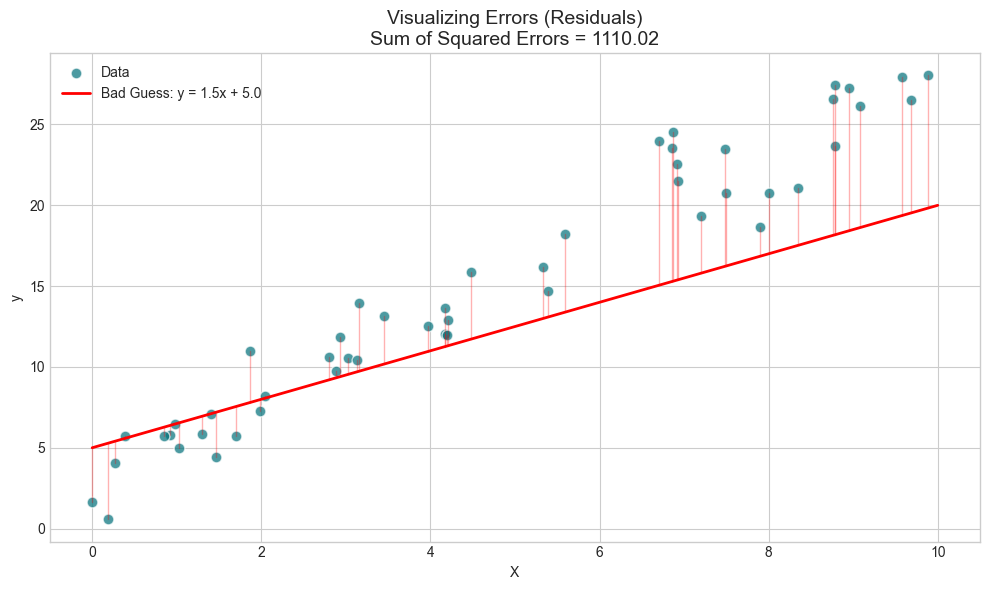

🎯 Goal: Minimize the Sum of Squared Errors (currently 1110.02)


In [29]:
# 📐 Visualize the "errors" (residuals)

# A bad guess for our line
bad_slope = 1.5
bad_intercept = 5.0
y_pred_bad = bad_slope * X + bad_intercept

plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='#007079', s=60, alpha=0.7, edgecolors='white', label='Data')

# Draw the bad line
plt.plot(X_line, bad_slope * X_line + bad_intercept, 'r-', linewidth=2, label=f'Bad Guess: y = {bad_slope}x + {bad_intercept}')

# Draw vertical lines showing errors
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred_bad[i]], 'r-', alpha=0.3, linewidth=1)

# Calculate SSE
sse_bad = np.sum((y - y_pred_bad) ** 2)
plt.title(f'Visualizing Errors (Residuals)\nSum of Squared Errors = {sse_bad:.2f}', fontsize=14)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

print(f"🎯 Goal: Minimize the Sum of Squared Errors (currently {sse_bad:.2f})")

---
## Step 3: The Math - Deriving the Normal Equation

Instead of guessing, we can solve for the **optimal** weights directly using Linear Algebra!

### Matrix Form

We rewrite our problem in matrix form:

$$\mathbf{y} = \mathbf{X} \mathbf{w} + \boldsymbol{\varepsilon}$$

Where:
- $\mathbf{X}$ is our **design matrix** (with a column of 1s for the bias)
- $\mathbf{w}$ is our weight vector $[w_0, w_1]^T$
- $\mathbf{y}$ is our target vector
- $\boldsymbol{\varepsilon}$ is the error/noise

### Deriving the Normal Equation

**Goal:** Find $\mathbf{w}$ that minimizes the Sum of Squared Errors (SSE).

Remember, SSE is the sum of all squared errors:

$$\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (\text{error}_i)^2$$

In matrix notation, this becomes:

$$\text{SSE} = \|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2 = (\mathbf{y} - \mathbf{X}\mathbf{w})^T(\mathbf{y} - \mathbf{X}\mathbf{w})$$

> 💡 The $\|\cdot\|^2$ notation means "squared length" of a vector, which equals the sum of squared components.

**Step 1: Expand the expression**

Using the rule $(a - b)^T(a - b) = a^Ta - a^Tb - b^Ta + b^Tb$:

$$\text{SSE} = \mathbf{y}^T\mathbf{y} - \mathbf{y}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T\mathbf{y} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}$$

Since $\mathbf{y}^T\mathbf{X}\mathbf{w}$ is a scalar (a single number), it equals its transpose: $\mathbf{w}^T\mathbf{X}^T\mathbf{y}$

$$\text{SSE} = \mathbf{y}^T\mathbf{y} - 2\mathbf{w}^T\mathbf{X}^T\mathbf{y} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}$$

**Step 2: Take the derivative with respect to $\mathbf{w}$**

To find the minimum, we take the derivative and set it to zero. Using matrix calculus rules:
- $\frac{\partial}{\partial \mathbf{w}}(\mathbf{w}^T\mathbf{a}) = \mathbf{a}$
- $\frac{\partial}{\partial \mathbf{w}}(\mathbf{w}^T\mathbf{A}\mathbf{w}) = 2\mathbf{A}\mathbf{w}$ (when $\mathbf{A}$ is symmetric)

$$\frac{\partial \text{SSE}}{\partial \mathbf{w}} = -2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\mathbf{w}$$

**Step 3: Set derivative to zero and solve**

At the minimum, the gradient equals zero:

$$-2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{0}$$

Rearranging:

$$\mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{y}$$

**Step 4: Solve for $\mathbf{w}$**

Multiply both sides by $(\mathbf{X}^T\mathbf{X})^{-1}$:

$$\boxed{
    {\mathbf{w}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}}$$

This is the **Normal Equation** — the closed-form solution that gives us the weights minimizing the sum of squared errors! 🎯

Let's implement this step by step!

In [30]:
# 🔧 Step 3a: Create the Design Matrix

# Our X is currently shape (n_samples,)
# We need to add a column of 1s for the bias term

# Reshape X to be a column vector
X_col = X.reshape(-1, 1)

# Add a column of ones at the beginning
ones = np.ones((n_samples, 1))
X_design = np.hstack([ones, X_col])

print("📐 Design Matrix X:")
print(f"   Shape: {X_design.shape}")
print(f"   First 5 rows:")
print(X_design[:5])

📐 Design Matrix X:
   Shape: (50, 2)
   First 5 rows:
[[1.00000000e+00 4.17022005e+00]
 [1.00000000e+00 7.20324493e+00]
 [1.00000000e+00 1.14374817e-03]
 [1.00000000e+00 3.02332573e+00]
 [1.00000000e+00 1.46755891e+00]]


In [31]:
# 🔧 Step 3b: Compute X^T X (the Gram Matrix)

XtX = X_design.T @ X_design

print("📐 Gram Matrix (X^T X):")
print(f"   Shape: {XtX.shape}")
print(f"   Values:")
print(XtX)
print(f"\n   Determinant: {np.linalg.det(XtX):.2f}")
print(f"   ✅ Determinant ≠ 0, so matrix is invertible!")

📐 Gram Matrix (X^T X):
   Shape: (2, 2)
   Values:
[[  50.          233.48779982]
 [ 233.48779982 1556.30753574]]

   Determinant: 23298.82
   ✅ Determinant ≠ 0, so matrix is invertible!


In [32]:
# 🔧 Step 3c: Compute X^T y

Xty = X_design.T @ y

print("📐 X^T y:")
print(f"   Shape: {Xty.shape}")
print(f"   Values: {Xty}")

📐 X^T y:
   Shape: (2,)
   Values: [ 746.56764152 4676.58725834]


In [33]:
# 🔧 Step 3d: Solve the Normal Equation!

# Method 1: Direct inverse (less stable numerically)
# w = np.linalg.inv(XtX) @ Xty

# Method 2: Using np.linalg.solve (more stable)
# This solves: XtX @ w = Xty
w = np.linalg.solve(XtX, Xty)

# Extract bias and slope
learned_intercept = w[0]
learned_slope = w[1]

print("🎯 SOLUTION FOUND!")
print("=" * 40)
print(f"   Learned Intercept (w₀): {learned_intercept:.4f}")
print(f"   Learned Slope (w₁):     {learned_slope:.4f}")
print("=" * 40)
print(f"   True Intercept: {TRUE_INTERCEPT}")
print(f"   True Slope:     {TRUE_SLOPE}")
print("=" * 40)
print(f"   Error in Intercept: {abs(learned_intercept - TRUE_INTERCEPT):.4f}")
print(f"   Error in Slope:     {abs(learned_slope - TRUE_SLOPE):.4f}")

🎯 SOLUTION FOUND!
   Learned Intercept (w₀): 3.0028
   Learned Slope (w₁):     2.5544
   True Intercept: 3.0
   True Slope:     2.5
   Error in Intercept: 0.0028
   Error in Slope:     0.0544


---
## Step 4: Visualize the Result

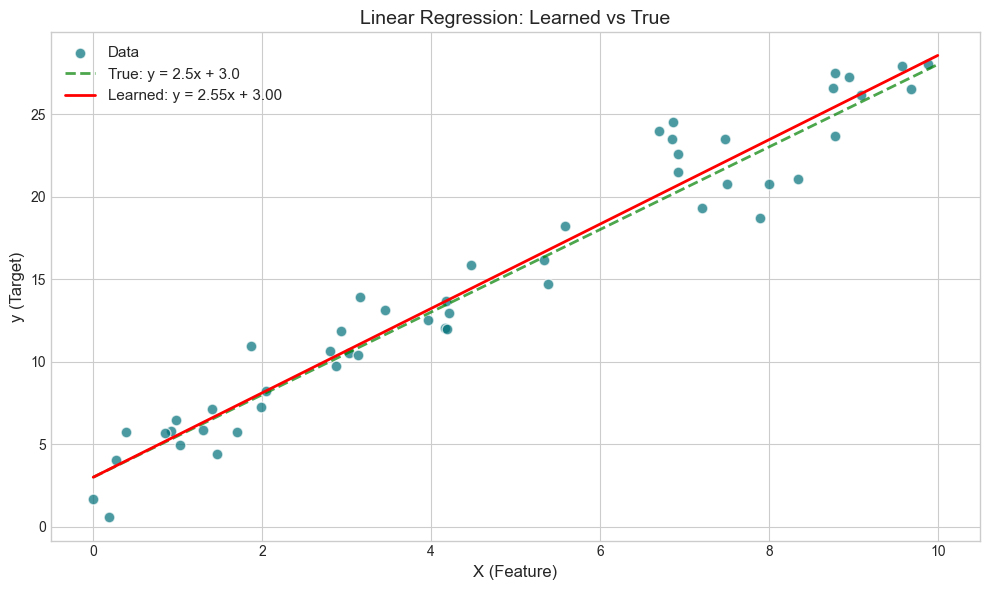

In [34]:
# 📊 Plot our learned line vs the true line

plt.figure(figsize=(10, 6))

# Data points
plt.scatter(X, y, c='#007079', s=60, alpha=0.7, edgecolors='white', label='Data')

# True line
y_true = TRUE_SLOPE * X_line + TRUE_INTERCEPT
plt.plot(X_line, y_true, 'g--', linewidth=2, alpha=0.7, 
         label=f'True: y = {TRUE_SLOPE}x + {TRUE_INTERCEPT}')

# Learned line
y_learned = learned_slope * X_line + learned_intercept
plt.plot(X_line, y_learned, 'r-', linewidth=2, 
         label=f'Learned: y = {learned_slope:.2f}x + {learned_intercept:.2f}')

plt.xlabel('X (Feature)', fontsize=12)
plt.ylabel('y (Target)', fontsize=12)
plt.title('Linear Regression: Learned vs True', fontsize=14)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

---
## Step 5: Evaluate the Model

Let's calculate some metrics to see how well our model performs.

In [35]:
# 📏 Model Evaluation

# Predictions
y_pred = learned_slope * X + learned_intercept

# Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R² Score (Coefficient of Determination)
ss_res = np.sum((y - y_pred) ** 2)       # Residual sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)   # Total sum of squares
r2 = 1 - (ss_res / ss_tot)

print("📊 MODEL EVALUATION")
print("=" * 40)
print(f"   Mean Squared Error (MSE):  {mse:.4f}")
print(f"   Root MSE (RMSE):           {rmse:.4f}")
print(f"   R² Score:                  {r2:.4f}")
print("=" * 40)
print(f"\n💡 R² = {r2:.2%} of variance explained by the model")

📊 MODEL EVALUATION
   Mean Squared Error (MSE):  3.2734
   Root MSE (RMSE):           1.8092
   R² Score:                  0.9489

💡 R² = 94.89% of variance explained by the model


---
## Step 6: Compare with sklearn

Let's verify our implementation matches sklearn!

In [36]:
# Compare with sklearn
from sklearn.linear_model import LinearRegression

# Sklearn model
sklearn_model = LinearRegression()
sklearn_model.fit(X.reshape(-1, 1), y)

print("🔬 COMPARISON: Our Model vs sklearn")
print("=" * 50)
print(f"{'Metric':<20} {'Ours':<15} {'sklearn':<15}")
print("-" * 50)
print(f"{'Intercept (bias)':<20} {learned_intercept:<15.6f} {sklearn_model.intercept_:<15.6f}")
print(f"{'Slope (weight)':<20} {learned_slope:<15.6f} {sklearn_model.coef_[0]:<15.6f}")
print(f"{'R² Score':<20} {r2:<15.6f} {sklearn_model.score(X.reshape(-1,1), y):<15.6f}")
print("=" * 50)
print("\n✅ Our implementation matches sklearn!")

🔬 COMPARISON: Our Model vs sklearn
Metric               Ours            sklearn        
--------------------------------------------------
Intercept (bias)     3.002846        3.002846       
Slope (weight)       2.554418        2.554418       
R² Score             0.948921        0.948921       

✅ Our implementation matches sklearn!


---
## 🎓 Key Takeaways

### What We Built
A fully functional Linear Regression model using **only NumPy**!

### The Math Behind It
The **Normal Equation** gives us the closed-form solution:

$$\hat{\mathbf{w}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

### Key Linear Algebra Concepts Used
1. **Matrix Multiplication** — Building $X^T X$ and $X^T y$
2. **Matrix Inverse** — Solving for weights
3. **Determinant** — Checking if solution exists (det ≠ 0)

### When to Use This vs Gradient Descent
| Normal Equation | Gradient Descent |
|-----------------|------------------|
| ✅ Exact solution | ⚠️ Approximate |
| ✅ No hyperparameters | ⚠️ Learning rate, iterations |
| ⚠️ Slow for large n_features | ✅ Scales well |
| ⚠️ Needs invertible $X^T X$ | ✅ Works even with collinearity |

---

**You now understand the math behind sklearn's LinearRegression!** 🚀